# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th and come to class . Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  6291k      0 --:--:--  0:02:23 --:--:-- 7364k


In [3]:
!rm SUSY.csv

rm: cannot remove 'SUSY.csv': No such file or directory


In [4]:
!gunzip SUSY.csv.gz

In [5]:
ls -lh

total 2.3G
-rwxrwxrwx 1 byrnes byrnes 390K Mar 16 01:04 Lab.7.ipynb*
-rwxrwxrwx 1 byrnes byrnes 5.9M Mar 16 00:15 Lab.7.pdf*
-rwxrwxrwx 1 byrnes byrnes 2.3G Mar 16 00:59 SUSY.csv*


The data is provided as a comma separated file.

In [6]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [7]:
!ls -lh

total 2.3G
-rwxrwxrwx 1 byrnes byrnes 390K Mar 16 01:06 Lab.7.ipynb
-rwxrwxrwx 1 byrnes byrnes 5.9M Mar 16 00:15 Lab.7.pdf
-rwxrwxrwx 1 byrnes byrnes 2.3G Mar 16 00:59 SUSY.csv


We see that we have 5 million datapoints.

In [8]:
!wc -l SUSY.csv

5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [10]:
!head -500000 SUSY.csv > SUSY-small.csv

In [11]:
ls -lh

total 2.5G
-rwxrwxrwx 1 byrnes byrnes 390K Mar 16 01:10 Lab.7.ipynb*
-rwxrwxrwx 1 byrnes byrnes 5.9M Mar 16 00:15 Lab.7.pdf*
-rwxrwxrwx 1 byrnes byrnes 228M Mar 16 01:11 SUSY-small.csv*
-rwxrwxrwx 1 byrnes byrnes 2.3G Mar 16 00:59 SUSY.csv*


In [19]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [3]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [4]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [5]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [6]:
FeatureNames

['cos_theta_r1',
 'M_TR_2',
 'MET_rel',
 'M_Delta_R',
 'R',
 'M_R',
 'dPhi_r_b',
 'MT2',
 'S_R',
 'axial_MET']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [14]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [15]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [16]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


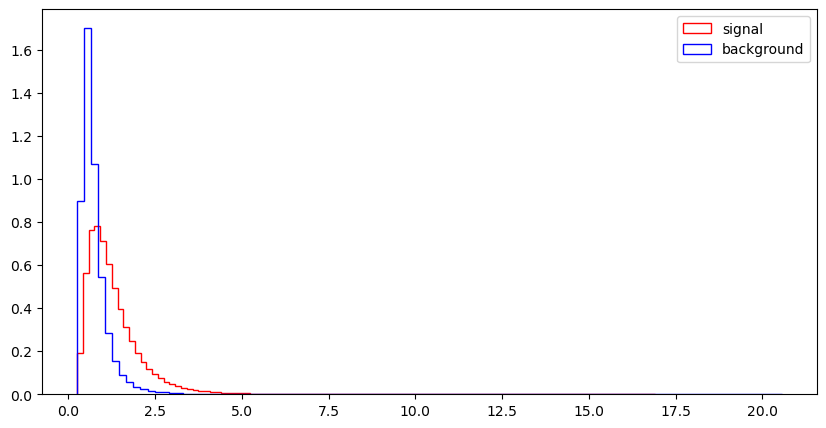

l_1_eta


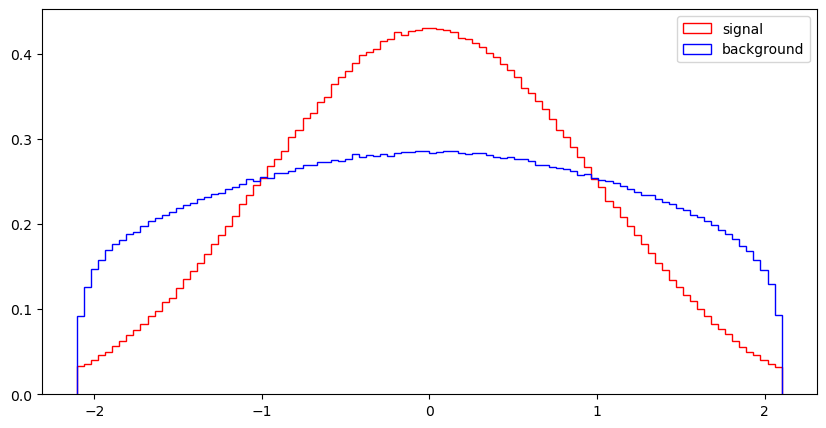

l_1_phi


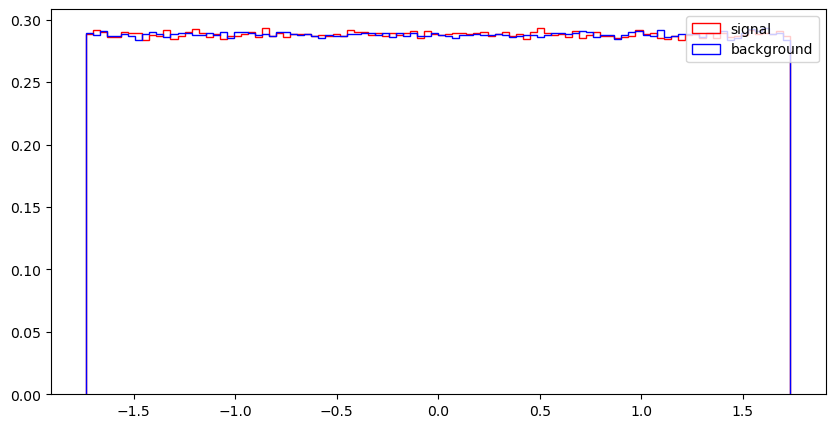

l_2_pT


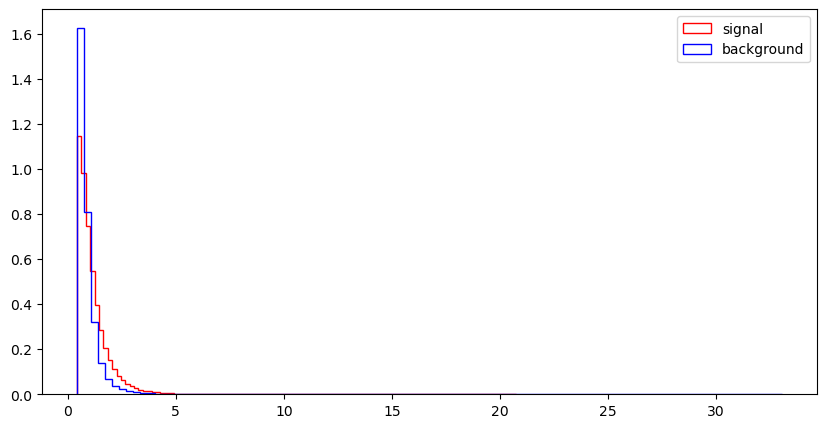

l_2_eta


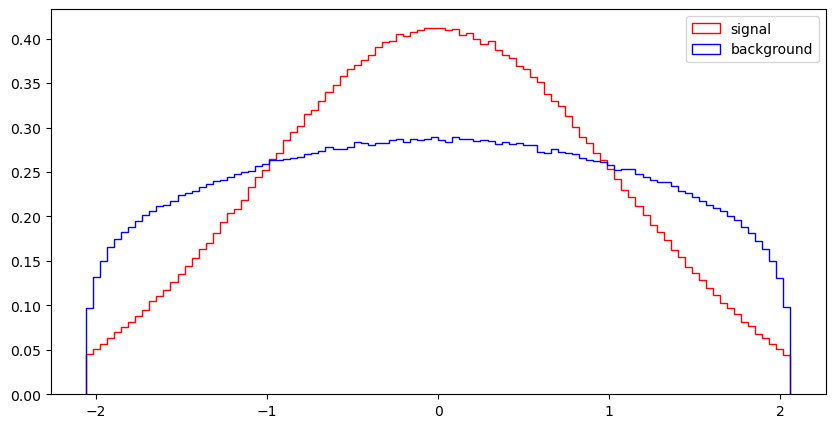

l_2_phi


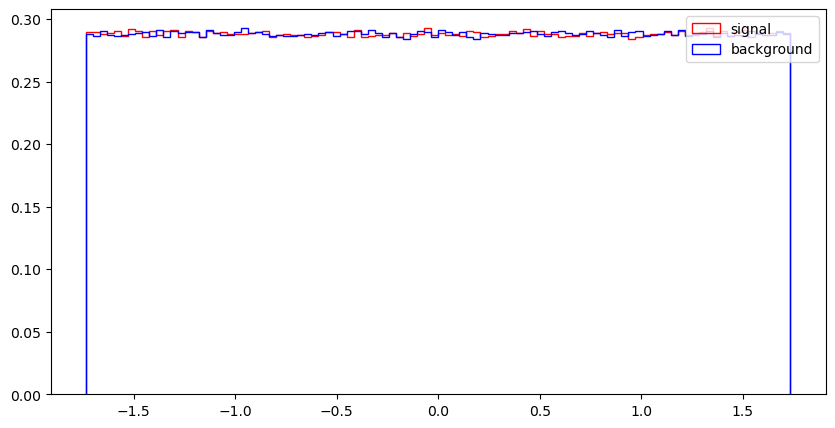

MET


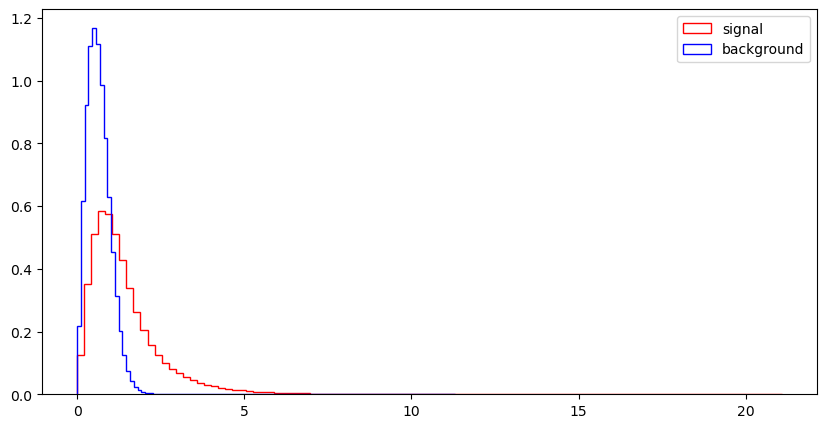

MET_phi


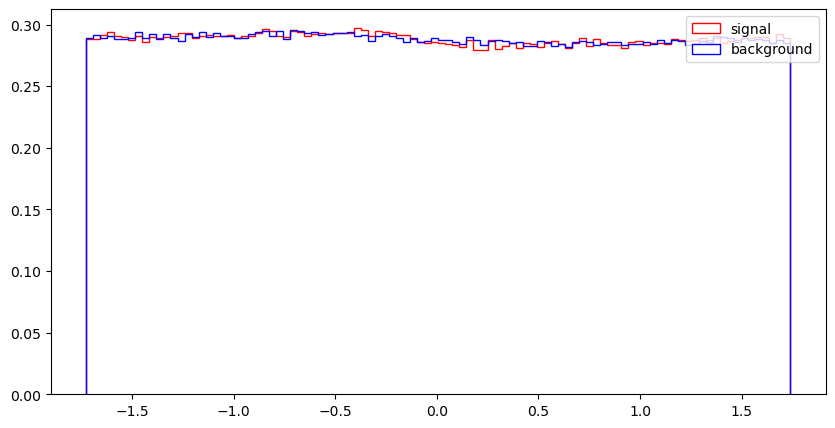

MET_rel


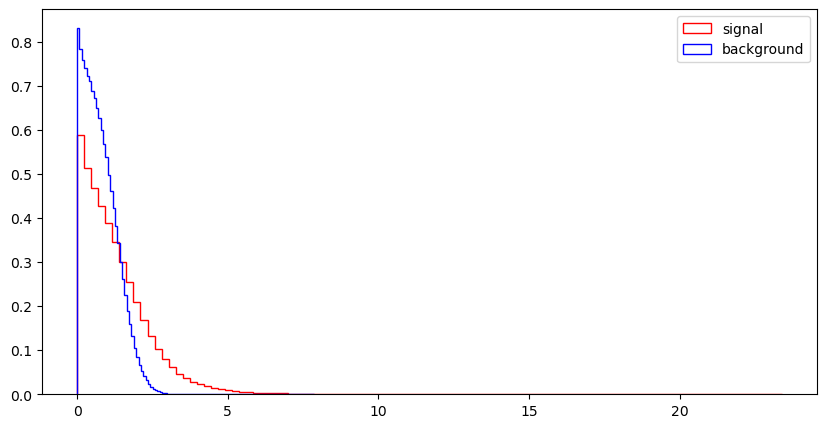

axial_MET


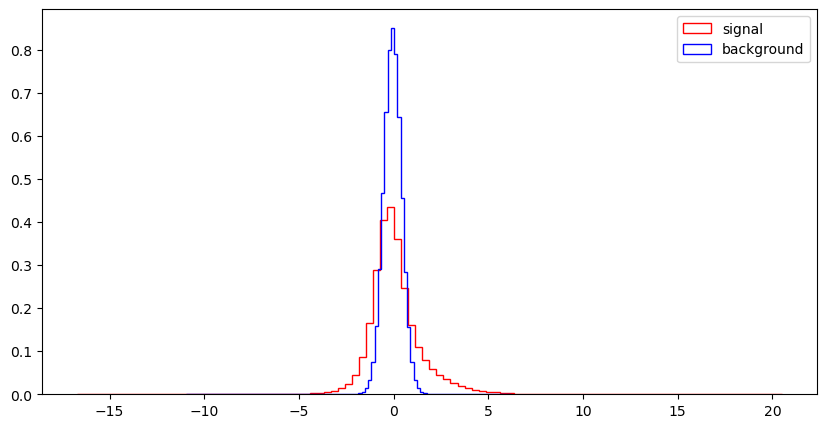

M_R


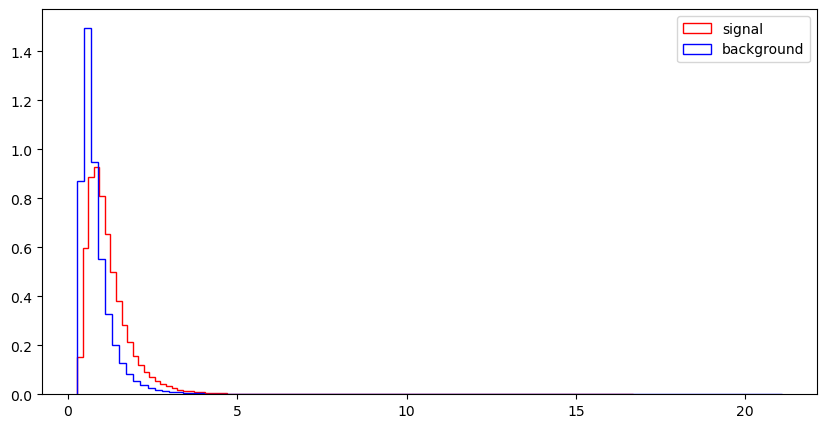

M_TR_2


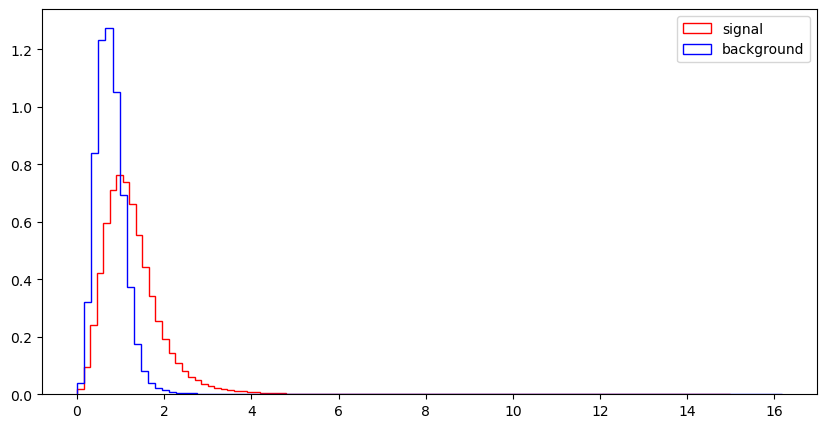

R


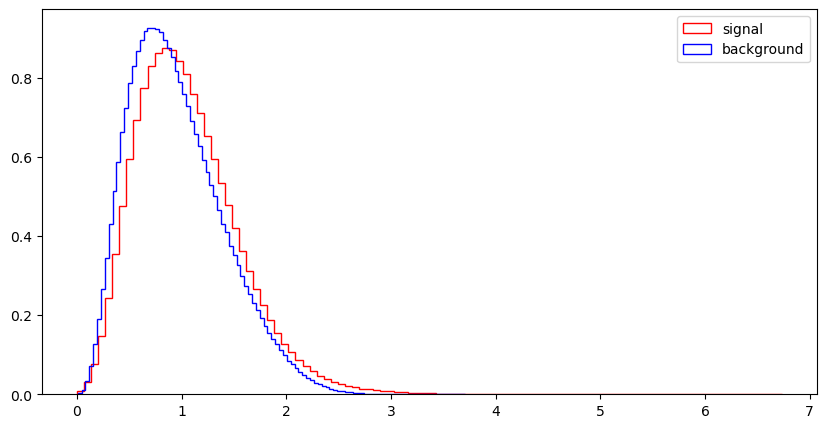

MT2


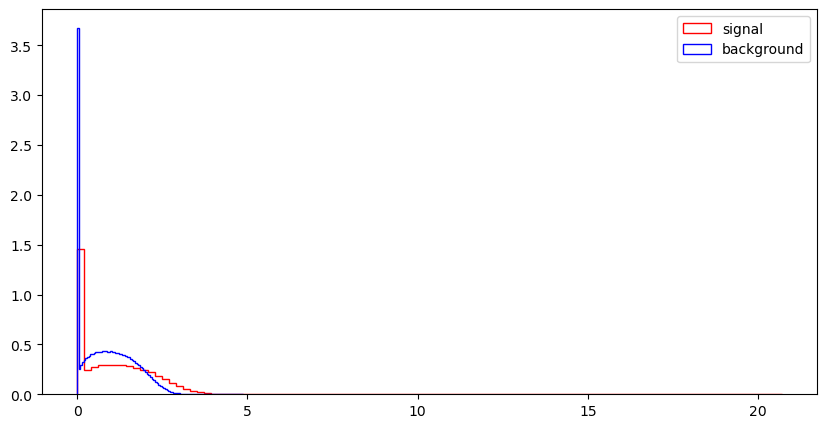

S_R


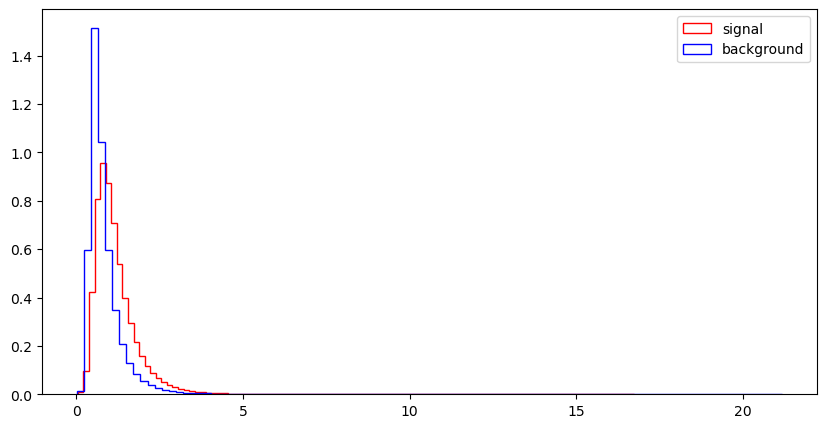

M_Delta_R


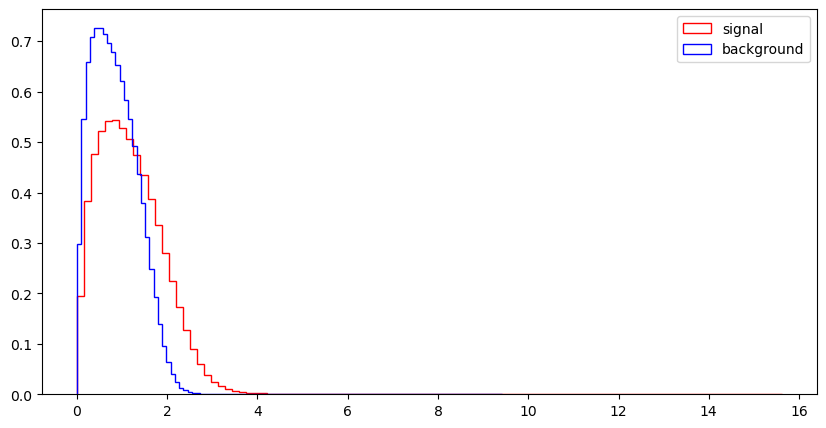

dPhi_r_b


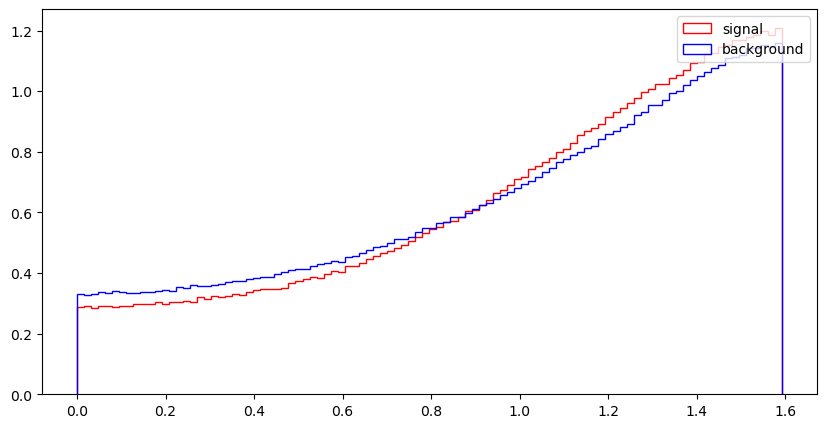

cos_theta_r1


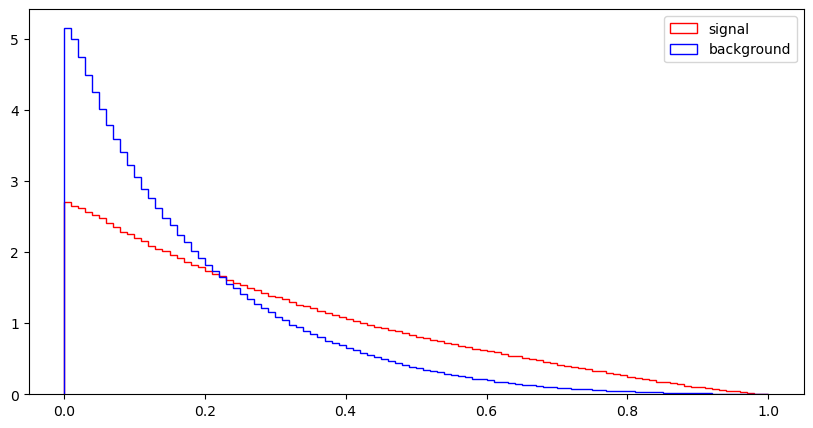

In [17]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

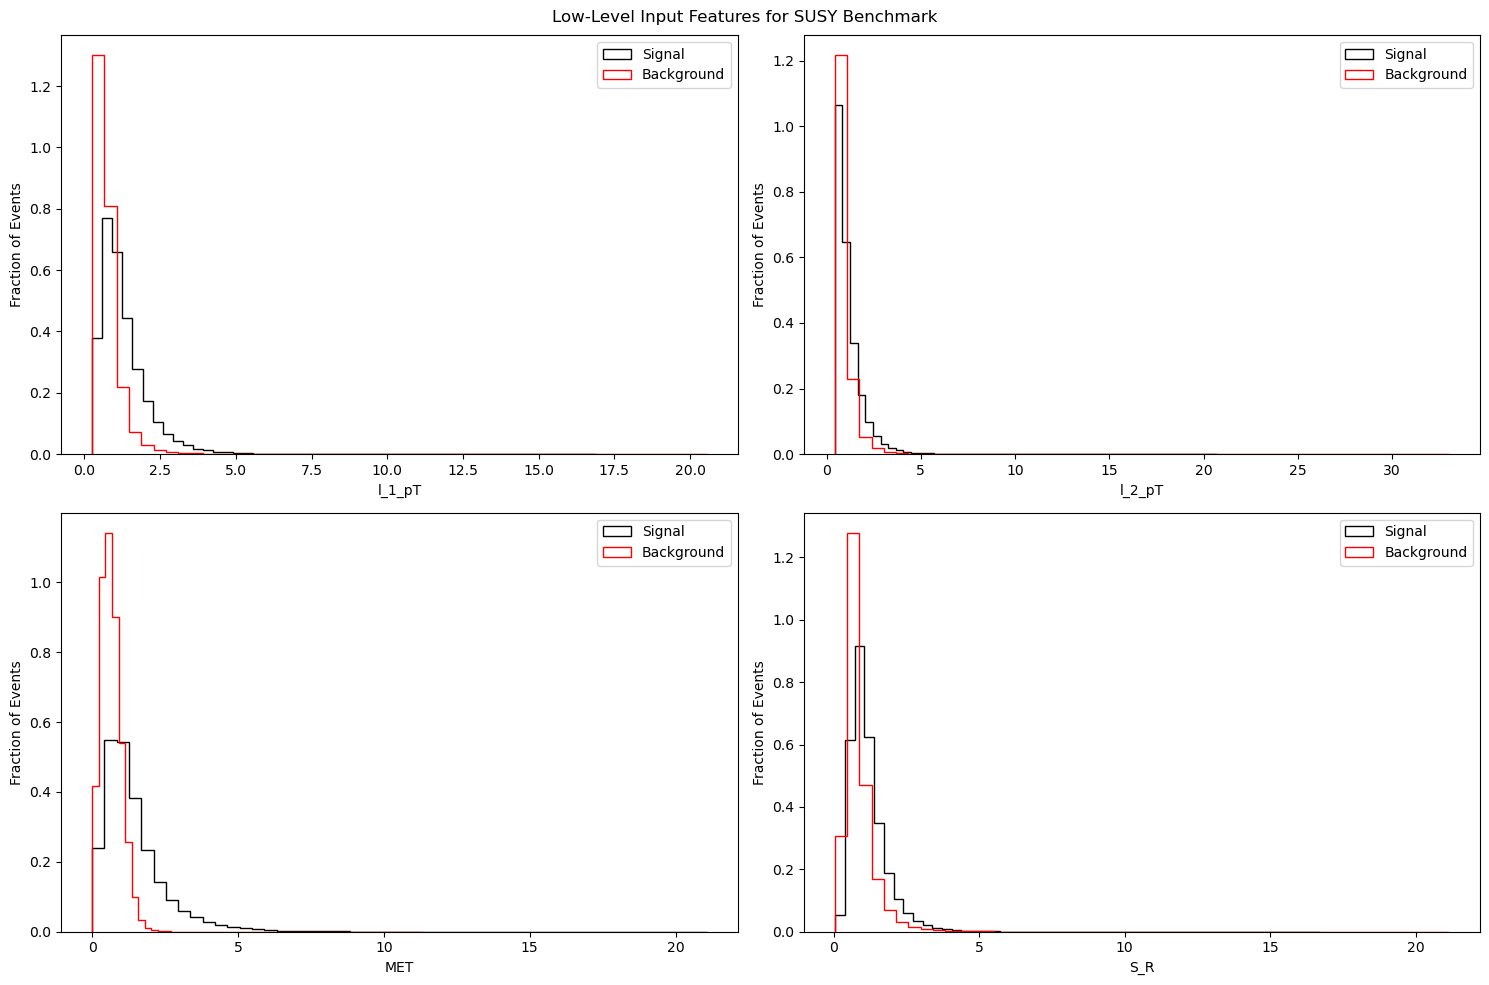

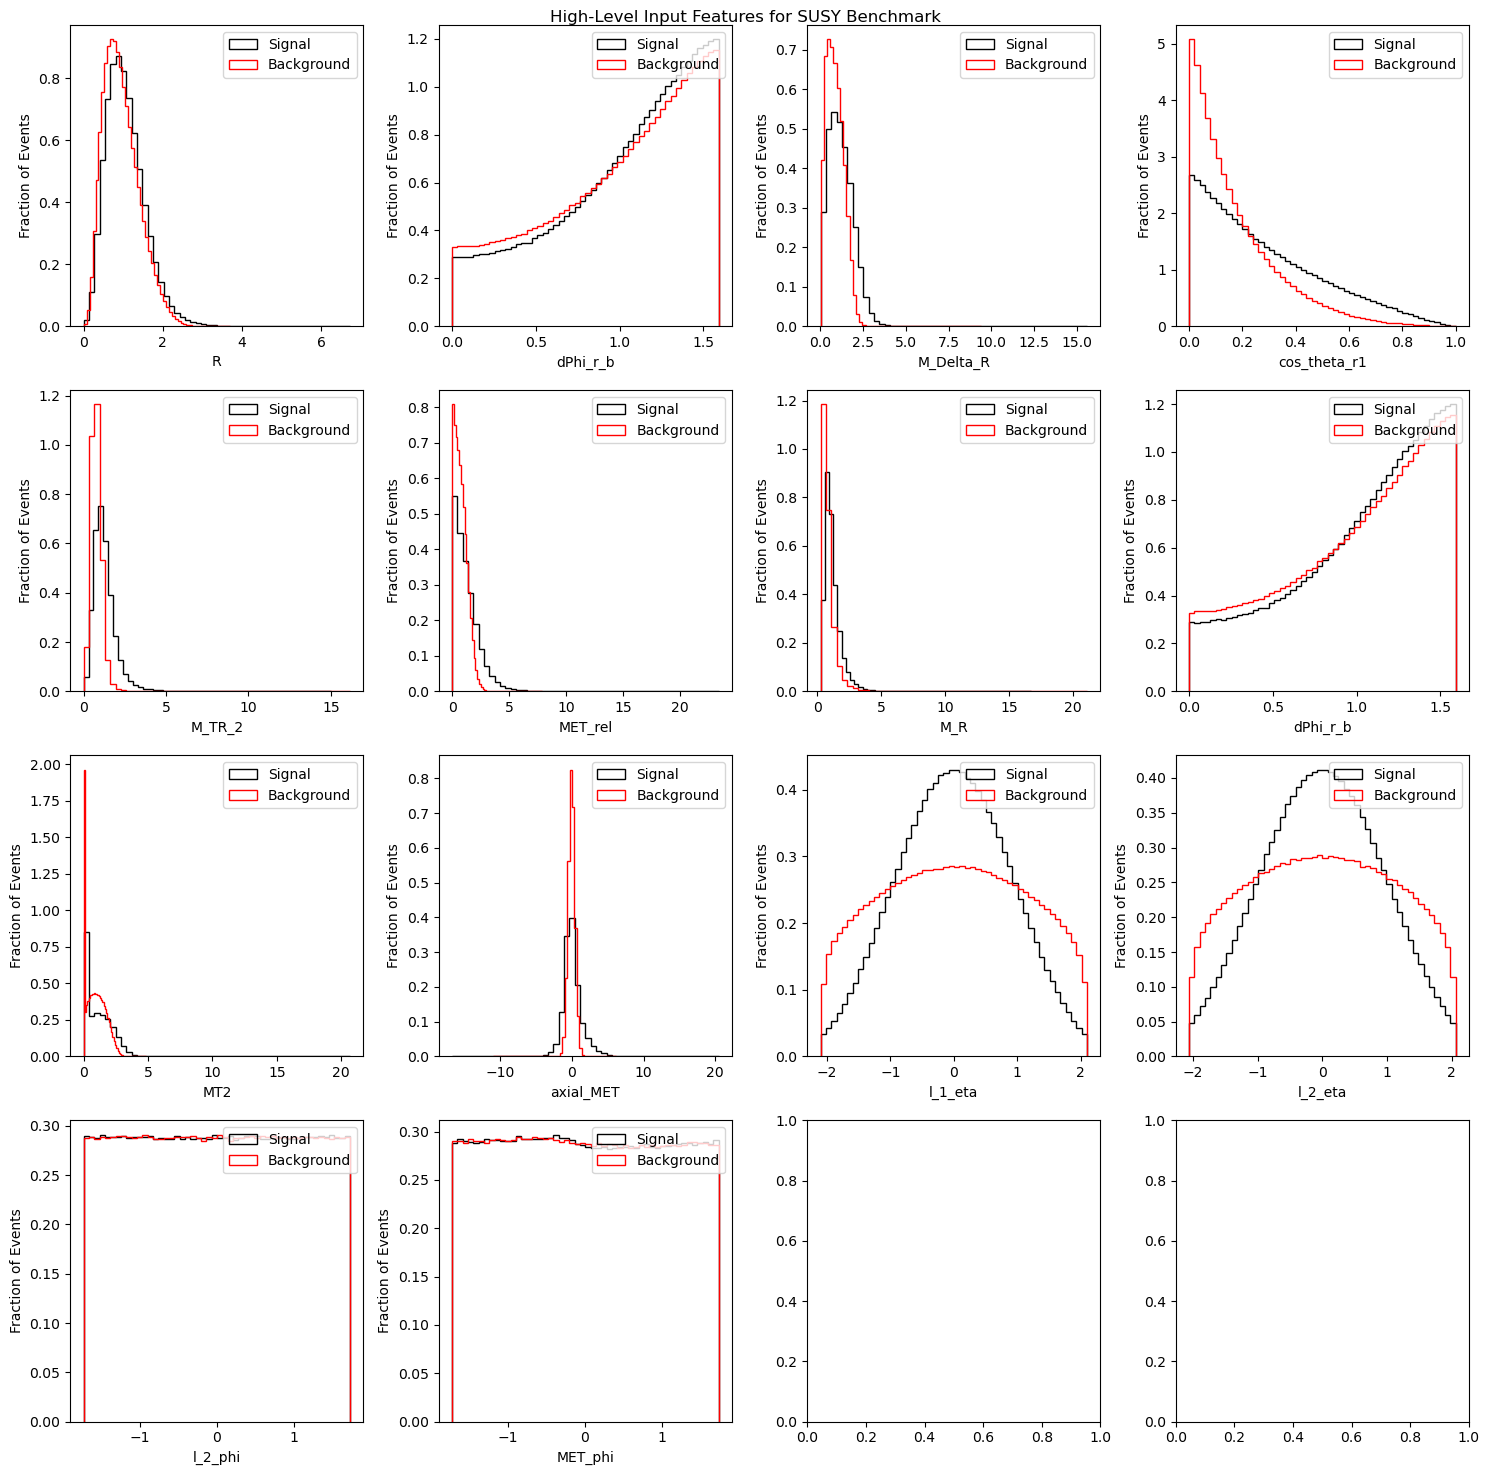

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


filename = "SUSY.csv"
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)


df_sig = df[df.signal == 1]
df_bkg = df[df.signal == 0]


low_level_features = ["l_1_pT", "l_2_pT", "MET","S_R"]
high_level_features = ["R","dPhi_r_b","M_Delta_R","cos_theta_r1", "M_TR_2", "MET_rel", "M_R", "dPhi_r_b", "MT2", "axial_MET","l_1_eta","l_2_eta","l_2_phi","MET_phi"]

# Creating Figure 5 - Low-level features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(low_level_features):
    axes[i].hist(df_sig[var], bins=50, density=True, histtype='step', color='black', label='Signal')
    axes[i].hist(df_bkg[var], bins=50, density=True, histtype='step', color='red', label='Background')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Fraction of Events")
    axes[i].legend()
    
fig.suptitle("Low-Level Input Features for SUSY Benchmark")
plt.tight_layout()
plt.savefig("fig5_reproduced.png")
plt.show()

# Creating Figure 6 - High-level features
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
axes = axes.flatten()

for i, var in enumerate(high_level_features):
    axes[i].hist(df_sig[var], bins=50, density=True, histtype='step', color='black', label='Signal')
    axes[i].hist(df_bkg[var], bins=50, density=True, histtype='step', color='red', label='Background')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Fraction of Events")
    axes[i].legend()
    
fig.suptitle("High-Level Input Features for SUSY Benchmark")
plt.tight_layout()
plt.savefig("fig6_reproduced.png")
plt.show()


## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [29]:
df = pd.read_csv("SUSY-small.csv", names=VarNames)

df_sig = df[df.signal == 1]
df_bkg = df[df.signal == 0]


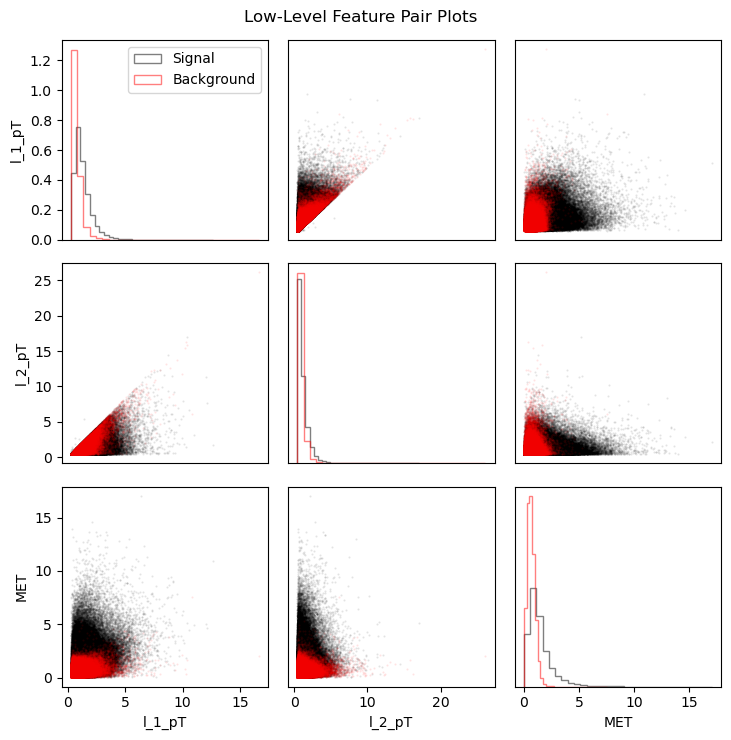

In [32]:
#Part a:
low_level_features = ["l_1_pT", "l_2_pT", "MET", "S_R"]
high_level_features = ["R", "dPhi_r_b", "M_Delta_R", "cos_theta_r1", "M_TR_2", "MET_rel", "M_R", "MT2", "axial_MET", "l_1_eta", "l_2_eta", "l_2_phi", "MET_phi"]

import matplotlib.pyplot as plt

def pair_plot(features, df_signal, df_background, title):
    n = len(features)
    fig, axes = plt.subplots(n, n, figsize=(2.5*n, 2.5*n))
    
    for i in range(n):
        for j in range(n):
            ax = axes[i, j]
            if i == j:
                ax.hist(df_signal[features[i]], bins=30, color='black', alpha=0.5, density=True, label='Signal', histtype='step')
                ax.hist(df_background[features[i]], bins=30, color='red', alpha=0.5, density=True, label='Background', histtype='step')
                if i == 0 and j == 0:
                    ax.legend()
            else:
                ax.plot(df_signal[features[j]], df_signal[features[i]], 'k.', alpha=0.1, markersize=1)
                ax.plot(df_background[features[j]], df_background[features[i]], 'r.', alpha=0.1, markersize=1)
            if i == n - 1:
                ax.set_xlabel(features[j])
            else:
                ax.set_xticks([])
            if j == 0:
                ax.set_ylabel(features[i])
            else:
                ax.set_yticks([])

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()
pair_plot(low_level_features[:3], df_sig, df_bkg, "Low-Level Feature Pair Plots")


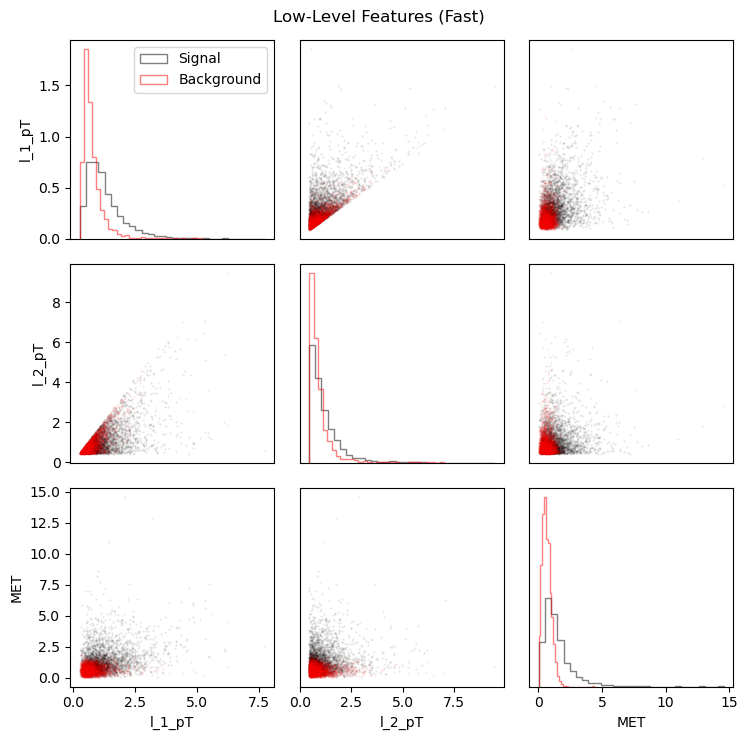

In [34]:
#part b:
def pair_plot_fast(features, df_signal, df_background, title, sample_size=3000):
    n = len(features)
    fig, axes = plt.subplots(n, n, figsize=(2.5 * n, 2.5 * n))

    # Downsample data
    sig_sample = df_signal.sample(n=min(sample_size, len(df_signal)), random_state=1)
    bkg_sample = df_background.sample(n=min(sample_size, len(df_background)), random_state=1)

    for i in range(n):
        for j in range(n):
            ax = axes[i, j]
            if i == j:
                ax.hist(sig_sample[features[i]], bins=30, histtype='step', color='black', alpha=0.5, density=True, label='Signal')
                ax.hist(bkg_sample[features[i]], bins=30, histtype='step', color='red', alpha=0.5, density=True, label='Background')
                if i == 0 and j == 0:
                    ax.legend()
            else:
                ax.plot(sig_sample[features[j]], sig_sample[features[i]], 'k.', alpha=0.1, markersize=1)
                ax.plot(bkg_sample[features[j]], bkg_sample[features[i]], 'r.', alpha=0.1, markersize=1)
            if i == n - 1:
                ax.set_xlabel(features[j])
            else:
                ax.set_xticks([])
            if j == 0:
                ax.set_ylabel(features[i])
            else:
                ax.set_yticks([])

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()
pair_plot_fast(low_level_features[:3], df_sig, df_bkg, "Low-Level Features (Fast)")


part b: This function produces the same output as in part a (pair plots), but with faster rendering due to downsampling the input data.
part c: Based on the pair plots generated in parts (a) and (b), some observables show clear separation between signal and background. In particular, M_TR_2 and MT2 display strong differences in their distributions, with signal events clustered at lower values and background events more spread out. The feature R also demonstrates noticeable separation, though with some overlap. These features are therefore good candidates for distinguishing signal from background. Other variables, such as l_1_pT and S_R, show weaker separation and may be less effective on their own.

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [36]:
#part a: install on Ubuntu
# part b and c
from tabulate import tabulate
from IPython.display import HTML, display

def show_matrices(features, df, title):
    data = df[features].values.T  # rows = variables
    cov_matrix = np.cov(data)
    corr_matrix = np.corrcoef(data)

    # Format as table using tabulate
    headers = [""] + features
    cov_table = tabulate(np.round(cov_matrix, 2), headers=features, showindex=features, tablefmt="html")
    corr_table = tabulate(np.round(corr_matrix, 2), headers=features, showindex=features, tablefmt="html")

    print(f" Covariance Matrix – {title}")
    display(HTML(cov_table))
    
    print(f"\n Correlation Matrix – {title}")
    display(HTML(corr_table))

# Example for low-level
show_matrices(low_level_features, df, "Low-Level Features")

# Example for high-level
show_matrices(high_level_features[:5], df, "High-Level Features (subset)")


 Covariance Matrix – Low-Level Features


,l_1_pT,l_2_pT,MET,S_R
l_1_pT,0.47,0.31,0.23,0.34
l_2_pT,0.31,0.43,0.08,0.32
MET,0.23,0.08,0.76,0.17
S_R,0.34,0.32,0.17,0.38



 Correlation Matrix – Low-Level Features


,l_1_pT,l_2_pT,MET,S_R
l_1_pT,1,0.68,0.38,0.81
l_2_pT,0.68,1,0.14,0.8
MET,0.38,0.14,1,0.31
S_R,0.81,0.8,0.31,1


 Covariance Matrix – High-Level Features (subset)


,R,dPhi_r_b,M_Delta_R,cos_theta_r1,M_TR_2
R,0.22,0.09,0.17,0.06,0.1
dPhi_r_b,0.09,0.19,0.04,0.01,0.06
M_Delta_R,0.17,0.04,0.39,0.04,0.24
cos_theta_r1,0.06,0.01,0.04,0.04,0.05
M_TR_2,0.1,0.06,0.24,0.05,0.34



 Correlation Matrix – High-Level Features (subset)


,R,dPhi_r_b,M_Delta_R,cos_theta_r1,M_TR_2
R,1,0.42,0.56,0.63,0.38
dPhi_r_b,0.42,1,0.16,0.11,0.23
M_Delta_R,0.56,0.16,1,0.32,0.67
cos_theta_r1,0.63,0.11,0.32,1,0.45
M_TR_2,0.38,0.23,0.67,0.45,1


4.2 part c: tables above show how features are linearly related. High correlation (close to ±1) may indicate redundancy, while low values suggest independence. This helps in feature selection and understanding how variables interact in classification tasks.

In [38]:
from tabulate import tabulate
from IPython.display import HTML, display
import numpy as np

# part d:

def display_cov_corr(df, features, title):
    data = df[features].values.T
    cov_matrix = np.cov(data)
    corr_matrix = np.corrcoef(data)

    cov_table = tabulate(np.round(cov_matrix, 2), headers=features, showindex=features, tablefmt="html")
    corr_table = tabulate(np.round(corr_matrix, 2), headers=features, showindex=features, tablefmt="html")

    print(f" Covariance Matrix – {title}")
    display(HTML(cov_table))

    print(f"\n Correlation Matrix – {title}")
    display(HTML(corr_table))
display_cov_corr(df, low_level_features, "Low-Level Features")
display_cov_corr(df, high_level_features[:5], "High-Level Features (subset)")



 Covariance Matrix – Low-Level Features


,l_1_pT,l_2_pT,MET,S_R
l_1_pT,0.47,0.31,0.23,0.34
l_2_pT,0.31,0.43,0.08,0.32
MET,0.23,0.08,0.76,0.17
S_R,0.34,0.32,0.17,0.38



 Correlation Matrix – Low-Level Features


,l_1_pT,l_2_pT,MET,S_R
l_1_pT,1,0.68,0.38,0.81
l_2_pT,0.68,1,0.14,0.8
MET,0.38,0.14,1,0.31
S_R,0.81,0.8,0.31,1


 Covariance Matrix – High-Level Features (subset)


,R,dPhi_r_b,M_Delta_R,cos_theta_r1,M_TR_2
R,0.22,0.09,0.17,0.06,0.1
dPhi_r_b,0.09,0.19,0.04,0.01,0.06
M_Delta_R,0.17,0.04,0.39,0.04,0.24
cos_theta_r1,0.06,0.01,0.04,0.04,0.05
M_TR_2,0.1,0.06,0.24,0.05,0.34



 Correlation Matrix – High-Level Features (subset)


,R,dPhi_r_b,M_Delta_R,cos_theta_r1,M_TR_2
R,1,0.42,0.56,0.63,0.38
dPhi_r_b,0.42,1,0.16,0.11,0.23
M_Delta_R,0.56,0.16,1,0.32,0.67
cos_theta_r1,0.63,0.11,0.32,1,0.45
M_TR_2,0.38,0.23,0.67,0.45,1


Hint: Example code for embedding a `tabulate` table into a notebook:

In [2]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

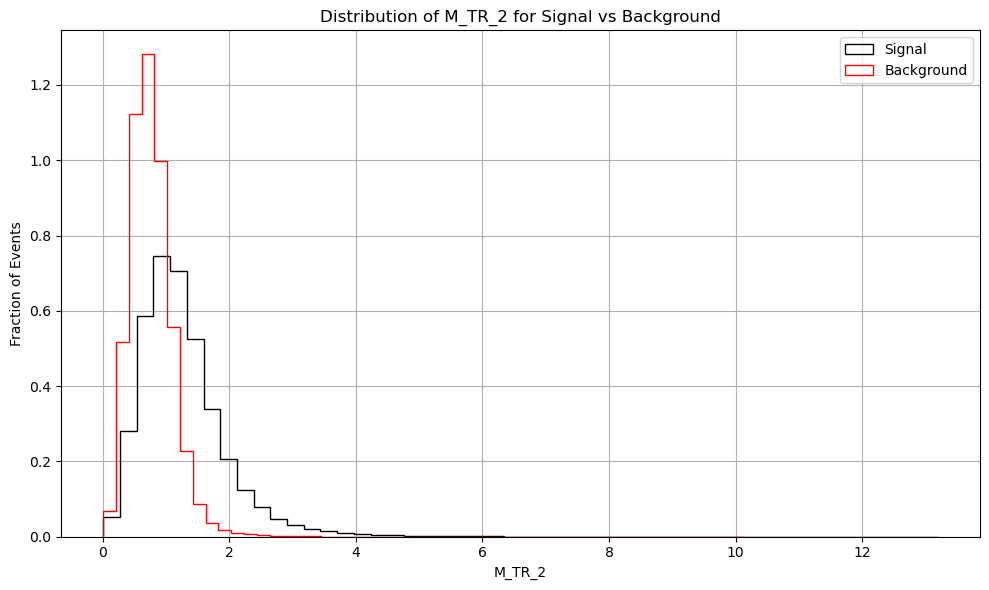

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = "SUSY-small.csv"
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", 
            "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", 
            "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

df_sig = df[df.signal == 1]
df_bkg = df[df.signal == 0]

plt.figure(figsize=(10, 6))
plt.hist(df_sig["M_TR_2"], bins=50, density=True, histtype='step', color='black', label='Signal')
plt.hist(df_bkg["M_TR_2"], bins=50, density=True, histtype='step', color='red', label='Background')
plt.xlabel("M_TR_2")
plt.ylabel("Fraction of Events")
plt.title("Distribution of M_TR_2 for Signal vs Background")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("exercise5_1_M_TR_2.png")
plt.show()


5.1 Answer: The signal peaks at lower values of M_TR_2, while the background is more spread out toward higher values.
So, the best cut is: M_TR_2 < xc

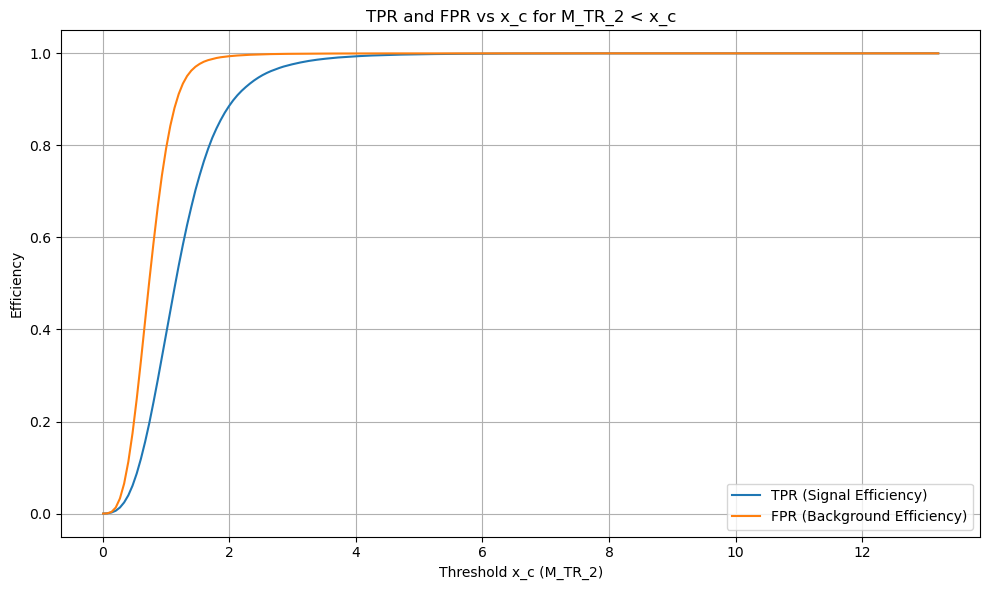

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#5.2
# Create threshold range for M_TR_2
x_c_values = np.linspace(df["M_TR_2"].min(), df["M_TR_2"].max(), 200)

# Lists to hold TPR (signal efficiency) and FPR (background efficiency)
tpr = []
fpr = []

# Calculate TPR and FPR for each threshold
for x_c in x_c_values:
    eps_s = (df_sig["M_TR_2"] < x_c).sum() / len(df_sig)
    eps_b = (df_bkg["M_TR_2"] < x_c).sum() / len(df_bkg)
    tpr.append(eps_s)
    fpr.append(eps_b)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_c_values, tpr, label="TPR (Signal Efficiency)")
plt.plot(x_c_values, fpr, label="FPR (Background Efficiency)")
plt.xlabel("Threshold x_c (M_TR_2)")
plt.ylabel("Efficiency")
plt.title("TPR and FPR vs x_c for M_TR_2 < x_c")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


5.2: We plotted TPR and FPR as functions of xc for the cut  M_TR_2<xc.
As xc increases, both TPR and FPR increase. Higher xc keeps more signal but also more background.

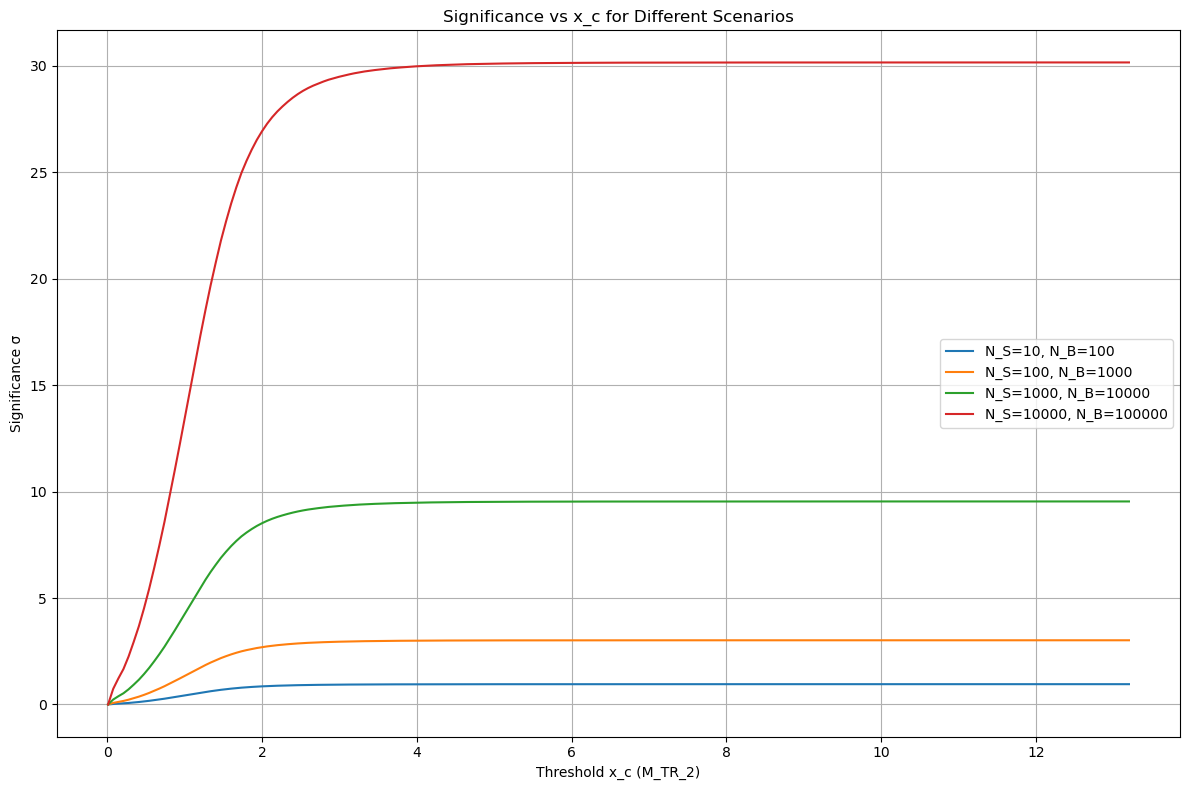

In [5]:
#  5.3 Define the scenarios (N_S, N_B)
scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]

# Plot significance for each scenario
plt.figure(figsize=(12, 8))

for N_S, N_B in scenarios:
    Np_S = np.array(tpr) * N_S
    Np_B = np.array(fpr) * N_B
    significance = Np_S / np.sqrt(Np_S + Np_B + 1e-9)  # add small number to avoid zero division
    label = f"N_S={N_S}, N_B={N_B}"
    plt.plot(x_c_values, significance, label=label)

# Final plot settings
plt.xlabel("Threshold x_c (M_TR_2)")
plt.ylabel("Significance σ")
plt.title("Significance vs x_c for Different Scenarios")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


5.3: For each scenario, we computed the significance σS  as a function of xc.
Each curve shows a peak where the signal is well-separated from background.
This helps identify the optimal xc for maximizing discovery potential depending on the dataset size.


## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [6]:
#6.1 
# Based on the significance plots from Exercise 5.3, we choose the following cuts:
selected_features = {
    "M_TR_2": 75,   
    "MT2": 90,      
    "R": 0.6
}

print("Chosen selection cuts based on significance optimization:")
for feature, x_c in selected_features.items():
    print(f"{feature} < {x_c}")


Chosen selection cuts based on significance optimization:
M_TR_2 < 75
MT2 < 90
R < 0.6


In [8]:
import pandas as pd
import numpy as np
from IPython.display import HTML, display
from tabulate import tabulate

#6.3
# Scenario
N_S, N_B = 1000, 10000

# Cut thresholds
cuts = {
    "M_TR_2": 75,
    "MT2": 90,
    "R": 0.6
}


sig_cut = df_sig.copy()
bkg_cut = df_bkg.copy()

cutflow_data = []

for feature, threshold in cuts.items():
    sig_cut = sig_cut[sig_cut[feature] < threshold]
    bkg_cut = bkg_cut[bkg_cut[feature] < threshold]
    
    eps_s = len(sig_cut) / len(df_sig)
    eps_b = len(bkg_cut) / len(df_bkg)
    
    Np_S = eps_s * N_S
    Np_B = eps_b * N_B
    
    sigma_s = Np_S / np.sqrt(Np_S + Np_B + 1e-9)
    
    cutflow_data.append([
        f"{feature} < {threshold}",
        round(eps_s, 4),
        round(eps_b, 4),
        int(Np_S),
        int(Np_B),
        round(sigma_s, 4)
    ])

headers = ["Cut Applied", "ε_S", "ε_B", "N'_S", "N'_B", "σ_S'"]

table_html = tabulate(cutflow_data, headers=headers, tablefmt='html')
display(HTML(table_html))



Cut Applied,ε_S,ε_B,N'_S,N'_B,σ_S'
M_TR_2 < 75,1,1,1000,10000,9.5346
MT2 < 90,1,1,1000,10000,9.5346
R < 0.6,0.1707,0.238,170,2379,3.3804


6.3: The features M_TR_2, MT2, and R are likely correlated. Applying cuts independently may lower the overall significance. Re-optimizing after each cut or changing the cut order can improve results.

## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



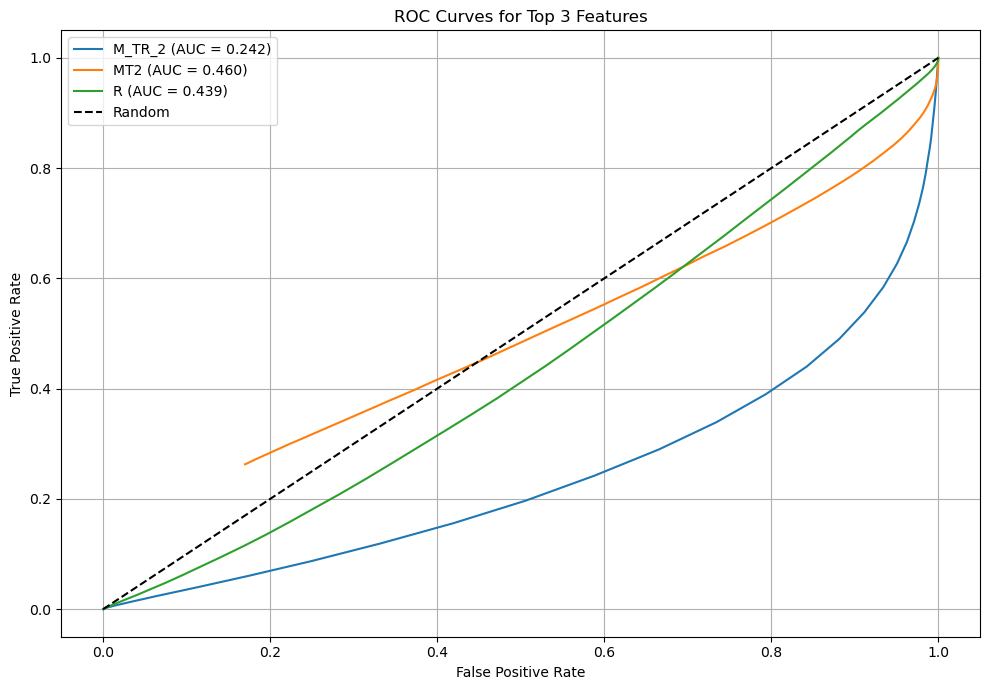

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 7.1 

def manual_roc_auc_fast(y_true, scores, num_thresholds=200):
    thresholds = np.linspace(scores.min(), scores.max(), num_thresholds)[::-1]
    tpr = []
    fpr = []

    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)

    for t in thresholds:
        y_pred = scores >= t
        TP = np.sum((y_true == 1) & (y_pred == 1))
        FP = np.sum((y_true == 0) & (y_pred == 1))

        tpr.append(TP / P)
        fpr.append(FP / N)

    tpr = np.array(tpr)
    fpr = np.array(fpr)
    auc = np.trapz(tpr, fpr)

    return fpr, tpr, auc

features = ["M_TR_2", "MT2", "R"]

plt.figure(figsize=(10, 7))
y_true = df["signal"].values

for feature in features:
    scores = -df[feature].values  # use -x since signal is associated with lower values
    fpr, tpr, auc_val = manual_roc_auc_fast(y_true, scores)
    plt.plot(fpr, tpr, label=f"{feature} (AUC = {auc_val:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Top 3 Features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("exercise7_1_manual_ROC.png")
plt.show()


In [15]:
#7.2

def plot_roc_curves(features, df, num_thresholds=200, title="ROC Curves"):
    def manual_roc_auc_fast(y_true, scores):
        thresholds = np.linspace(scores.min(), scores.max(), num_thresholds)[::-1]
        tpr = []
        fpr = []
        P = np.sum(y_true == 1)
        N = np.sum(y_true == 0)

        for t in thresholds:
            y_pred = scores >= t
            TP = np.sum((y_true == 1) & (y_pred == 1))
            FP = np.sum((y_true == 0) & (y_pred == 1))
            tpr.append(TP / P)
            fpr.append(FP / N)

        tpr = np.array(tpr)
        fpr = np.array(fpr)
        auc = np.trapz(tpr, fpr)
        return fpr, tpr, auc

    plt.figure(figsize=(10, 7))
    y_true = df["signal"].values

    for feature in features:
        scores = -df[feature].values
        fpr, tpr, auc_val = manual_roc_auc_fast(y_true, scores)
        plt.plot(fpr, tpr, label=f"{feature} (AUC = {auc_val:.3f})")

    plt.plot([0, 1], [0, 1], "k--", label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
# Later usage of the ROC Curves:
#plot_roc_curves(["M_TR_2", "MT2", "R"], df)


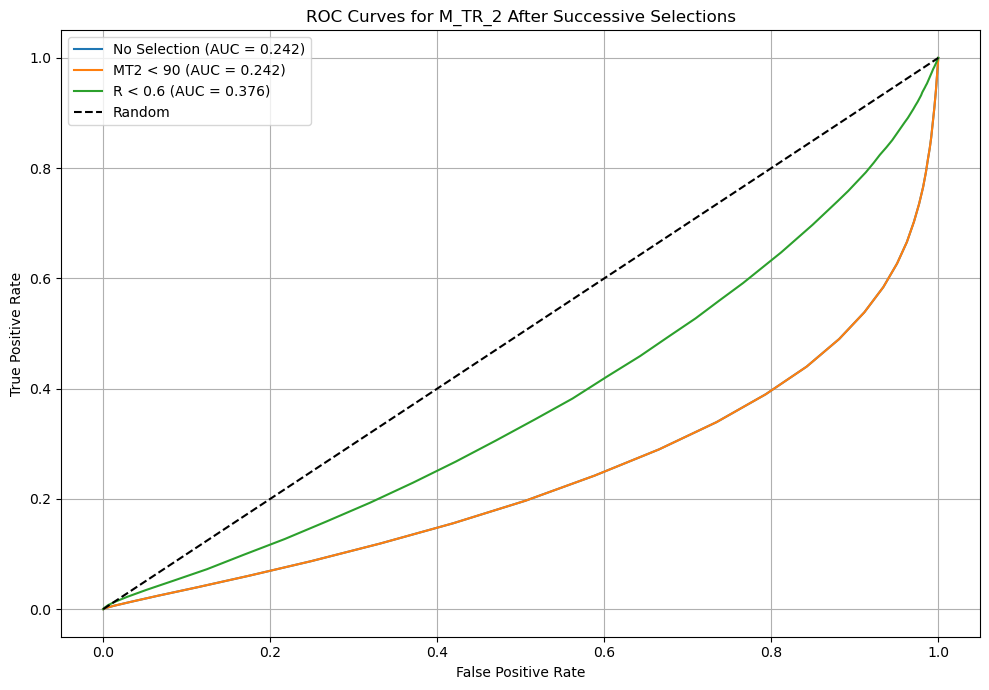

In [16]:
#7.3:

cuts = {
    "MT2": 90,
    "R": 0.6
}
base_feature = "M_TR_2"

dfs = [df.copy()]  
cut_labels = ["No Selection"]

temp_df = df.copy()
for feature, threshold in cuts.items():
    temp_df = temp_df[temp_df[feature] < threshold]
    dfs.append(temp_df.copy())
    cut_labels.append(f"{feature} < {threshold}")

plt.figure(figsize=(10, 7))
y_true_full = df["signal"].values

for data, label in zip(dfs, cut_labels):
    y_true = data["signal"].values
    scores = -data[base_feature].values
    fpr, tpr, auc_val = manual_roc_auc_fast(y_true, scores)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_val:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for M_TR_2 After Successive Selections")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


7.3: By plotting ROC curves for M_TR_2 after each selection. As we apply more cuts, the ROC curve shape and AUC change, showing how selection impacts the model's ability to distinguish signal from background.

MT2 < 90 → R < 0.6: 103561 rows
R < 0.6 → MT2 < 90: 103561 rows


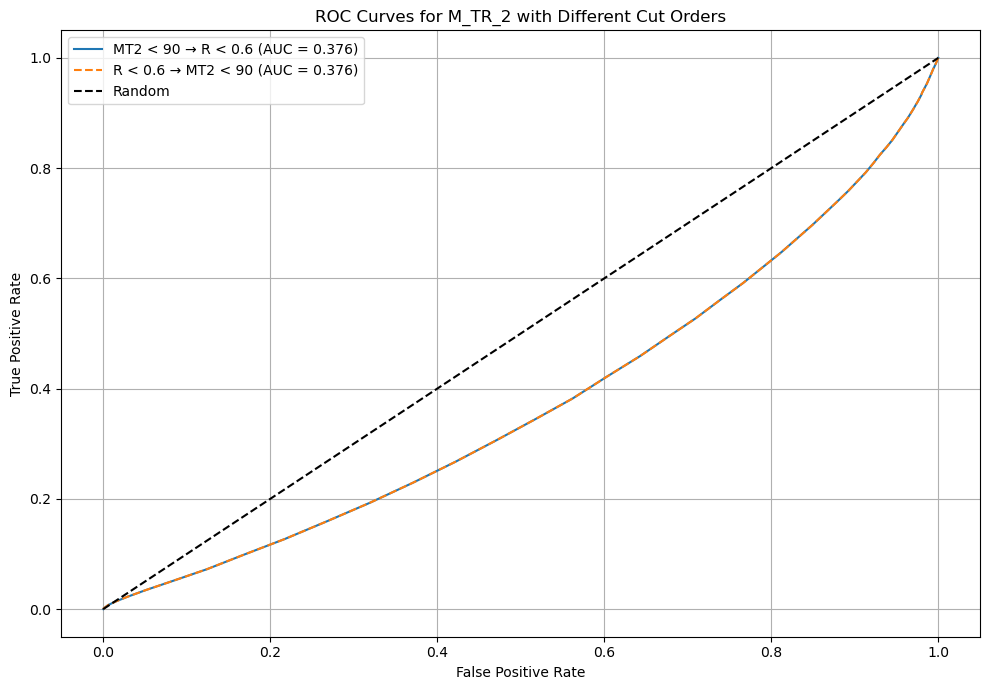

In [19]:
#7.4

cut_orders = [
    [("MT2", 90), ("R", 0.6)],
    [("R", 0.6), ("MT2", 90)]
]

plt.figure(figsize=(10, 7))
base_feature = "M_TR_2"
styles = ["-", "--"]

for i, order in enumerate(cut_orders):
    temp_df = df.copy()
    label_parts = []

    for feature, threshold in order:
        temp_df = temp_df[temp_df[feature] < threshold]
        label_parts.append(f"{feature} < {threshold}")

    cut_label = " → ".join(label_parts)
    print(f"{cut_label}: {len(temp_df)} rows")

    y_true = temp_df["signal"].values
    scores = -temp_df[base_feature].values
    fpr, tpr, auc_val = manual_roc_auc_fast(y_true, scores)
    plt.plot(fpr, tpr, styles[i], label=f"{cut_label} (AUC = {auc_val:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for M_TR_2 with Different Cut Orders")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

7.4: We tested two cut orders: MT2 < 90 → R < 0.6 and R < 0.6 → MT2 < 90. The final dataset size and ROC curves for M_TR_2 were nearly identical. This shows that the cut order had little to no effect in this specific case.

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [24]:
import numpy as np
# 8.1

features_lda = ["M_TR_2", "MT2", "R"]

X1 = df_sig[features_lda].values 
X2 = df_bkg[features_lda].values  

m1 = np.mean(X1, axis=0).reshape(-1, 1)
m2 = np.mean(X2, axis=0).reshape(-1, 1)

diff = m2 - m1
SB = np.dot(diff, diff.T)

SW = np.zeros((len(features_lda), len(features_lda)))

for X, mean in [(X1, m1), (X2, m2)]:
    for x in X:
        x = x.reshape(-1, 1)
        delta = x - mean
        SW += np.dot(delta, delta.T)

print("Between-class scatter matrix S_B:\n", SB)
print("\nWithin-class scatter matrix S_W:\n", SW)


Between-class scatter matrix S_B:
 [[0.24673725 0.06829617 0.05120911]
 [0.06829617 0.01890419 0.01417454]
 [0.05120911 0.01417454 0.0106282 ]]

Within-class scatter matrix S_W:
 [[138283.67705922  86106.38297349  45649.99857605]
 [ 86106.38297349 366482.79504865 114290.19002245]
 [ 45649.99857605 114290.19002245 109469.44576699]]


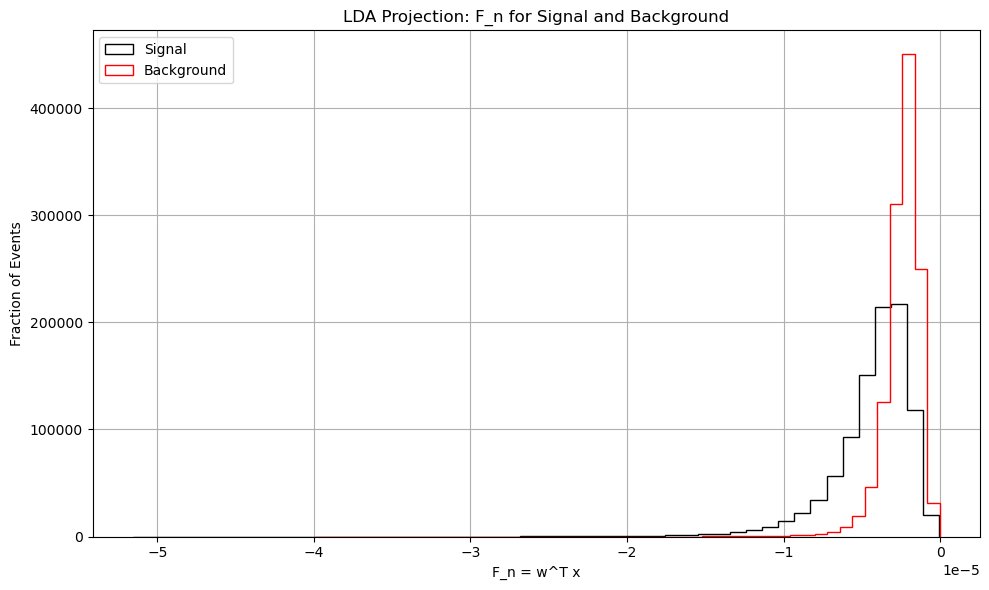

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 8.2

w = np.dot(np.linalg.inv(SW), (m2 - m1))

Fn_signal = np.dot(X1, w).flatten()
Fn_background = np.dot(X2, w).flatten()

plt.figure(figsize=(10, 6))
plt.hist(Fn_signal, bins=50, density=True, histtype='step', color='black', label='Signal')
plt.hist(Fn_background, bins=50, density=True, histtype='step', color='red', label='Background')

plt.xlabel("F_n = w^T x")
plt.ylabel("Fraction of Events")
plt.title("LDA Projection: F_n for Signal and Background")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




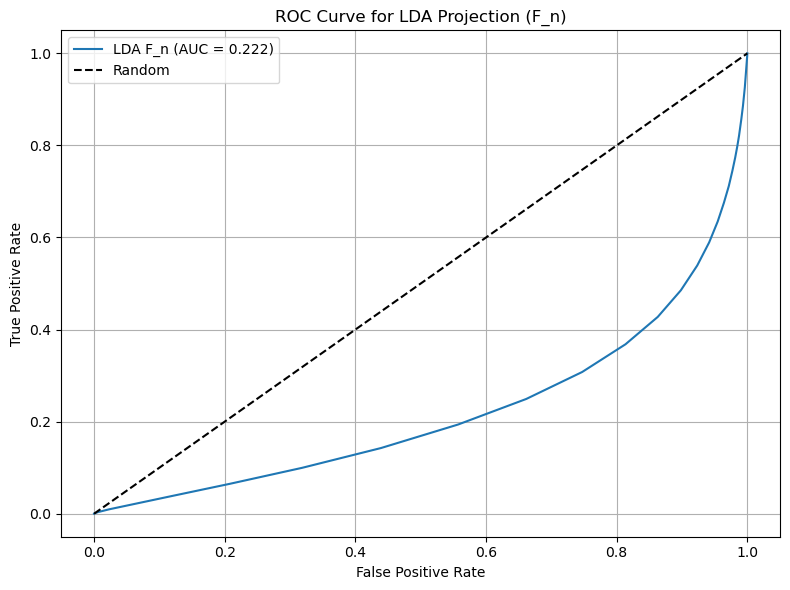

In [26]:
import numpy as np
import matplotlib.pyplot as plt

Fn_all = np.concatenate([Fn_signal, Fn_background])
y_all = np.concatenate([np.ones(len(Fn_signal)), np.zeros(len(Fn_background))])

thresholds = np.linspace(Fn_all.min(), Fn_all.max(), 200)[::-1]
tpr = []
fpr = []

P = np.sum(y_all == 1)
N = np.sum(y_all == 0)

for t in thresholds:
    y_pred = Fn_all >= t
    TP = np.sum((y_all == 1) & (y_pred == 1))
    FP = np.sum((y_all == 0) & (y_pred == 1))
    tpr.append(TP / P)
    fpr.append(FP / N)

tpr = np.array(tpr)
fpr = np.array(fpr)
auc_val = np.trapz(tpr, fpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"LDA F_n (AUC = {auc_val:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for LDA Projection (F_n)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
from IPython.display import HTML, display
from tabulate import tabulate
# 8.4 

headers = ["N_S", "N_B", "Max Significance (σ_S')"]
table_html = tabulate(significance_results, headers=headers, tablefmt='html')

display(HTML(table_html))



N_S,N_B,Max Significance (σ_S')
10,100,0.9535
100,1000,3.0151
1000,10000,9.5346
10000,100000,30.1511
